# Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
#Importing dataset
monthly_data=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\Monthly_data_cmo.csv")

In [3]:
monthly_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [4]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [5]:
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [6]:
# lowering the commodity case to avoid multiple commodity of same type
monthly_data.loc[:,1:2] = [i.lower() for i in monthly_data.Commodity.values]

In [7]:
monthly_data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [8]:
df=monthly_data

# Testing for Outliers

In [9]:
commodities=list(df["Commodity"].unique())

In [10]:
len(commodities)

204

In [11]:
apmc=list(df["APMC"].unique())

In [12]:
apmc

['Ahmednagar',
 'Akole',
 'Jamkhed',
 'Kopargaon',
 'Newasa',
 'Newasa-Ghodegaon',
 'Parner',
 'Pathardi',
 'Rahata',
 'Rahuri',
 'Rahuri-Vambori',
 'Sangamner',
 'Shevgaon',
 'Shevgaon-Bodhegaon',
 'Shrirampur',
 'Shrirampur-Belapur',
 'Shrigonda',
 'Shrigonda-Ghogargaon',
 'Karjat (A- Nagar)',
 'Rahuri-Songaon',
 'Akola',
 'Akot',
 'Balapur',
 'Murtizapur',
 'Patur',
 'Telhara',
 'Barshi Takli',
 'Achalpur',
 'Amarawati',
 'Amarawati-Fruit And Vegetables',
 'Anajngaon Surji',
 'Chandur Bajar',
 'Chandur Rly.',
 'Daryapur',
 'Dhamangaon-Rly',
 'Dharni',
 'Morshi',
 'Nandgaon Khandeshwar',
 'Varud',
 'Varud-Rajura Bazar',
 'Tiwasa',
 'Aurangabad',
 'Fulambri',
 'Gangapur',
 'Kannad',
 'Lasur Station',
 'Paithan',
 'Sillod',
 'Sillod-Bharadi',
 'Soygaon',
 'Vaijapur',
 'Khultabad',
 'Ambejogai',
 'Beed',
 'Gevrai',
 'Kada',
 'Kada (Ashti)',
 'Kej',
 'Kille Dharur',
 'Majalgaon',
 'Parli-Vaijnath',
 'Bhandara',
 'Lakhandur',
 'Lakhani',
 'Pavani',
 'Tumsar',
 'Buldhana',
 'Buldhana-Dhad'

In [13]:
data_temp=df[df["Commodity"]=="bajri"]

In [14]:
data_t=data_temp[data_temp["APMC"]=="Akole"]

In [15]:
data_t

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
51,Akole,bajri,2015,April,52,1357,1800,1525,2015-04,Ahmadnagar,Maharashtra
52,Akole,bajri,2016,April,75,1460,1960,1685,2016-04,Ahmadnagar,Maharashtra
397,Akole,bajri,2015,August,12,1400,1800,1625,2015-08,Ahmadnagar,Maharashtra
398,Akole,bajri,2016,August,31,1433,2033,1675,2016-08,Ahmadnagar,Maharashtra
727,Akole,bajri,2014,December,40,1375,1750,1563,2014-12,Ahmadnagar,Maharashtra
728,Akole,bajri,2015,December,37,1350,1850,1619,2015-12,Ahmadnagar,Maharashtra
1090,Akole,bajri,2015,February,4855,1014,1351,1196,2015-02,Ahmadnagar,Maharashtra
1091,Akole,bajri,2016,February,39,1433,1833,1575,2016-02,Ahmadnagar,Maharashtra
1439,Akole,bajri,2015,January,74,1395,1840,1580,2015-01,Ahmadnagar,Maharashtra
1440,Akole,bajri,2016,January,64,1430,1860,1575,2016-01,Ahmadnagar,Maharashtra


In [16]:
data_t.shape

(27, 11)

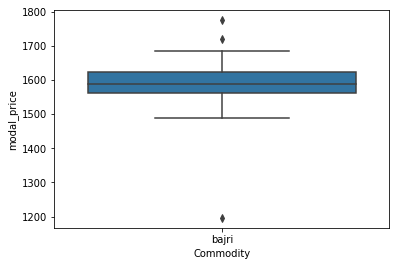

In [17]:
sns.boxplot(x="Commodity", y="modal_price",data=data_t)
plt.savefig("Akole_bajri_outlier",dpi=300)

In [18]:
Q1 = data_t["modal_price"].quantile(0.25)
Q3 = data_t["modal_price"].quantile(0.75)
IQR = Q3-Q1 #Interquartile range

In [19]:
IQR

60.5

In [20]:
# outlier points Akole for bajri
outlier_points=data_t[(data_t["modal_price"] < (Q1 - 1.5 * IQR)) | (data_t["modal_price"] > (Q3 + 1.5 * IQR))]
outlier_points

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
1090,Akole,bajri,2015,February,4855,1014,1351,1196,2015-02,Ahmadnagar,Maharashtra
1822,Akole,bajri,2016,July,32,1450,2200,1719,2016-07,Ahmadnagar,Maharashtra
2823,Akole,bajri,2015,May,9,1375,1900,1775,2015-05,Ahmadnagar,Maharashtra


In [21]:
#Outliers removed from a single commodity belonging to a particular APMC
#data_filter=data_t[(data_t["modal_price"]>(Q1 - 1.5 * IQR)) & (data_t["modal_price"] < (Q3 + 1.5 * IQR))]
data_filter=data_t[~((data_t["modal_price"] < (Q1 - 1.5 * IQR)) | (data_t["modal_price"] > (Q3 + 1.5 * IQR)))]

In [22]:
data_filter.shape

(24, 11)

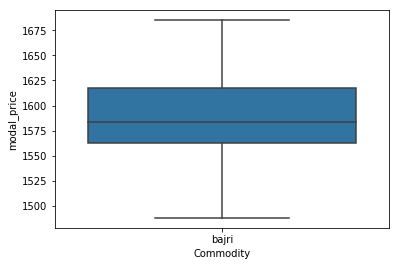

In [23]:
sns.boxplot(x="Commodity", y="modal_price",data=data_filter)
plt.savefig("Akole_bajri_outlier_removed",dpi=300)

In [24]:
#plot commodity price outliers in a particular type
def plot_outliers(df,apmc): 
    commodities=list(df["Commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            Q1 = data_t["modal_price"].quantile(0.25)
            Q3 = data_t["modal_price"].quantile(0.75)
            IQR = Q3-Q1 #Interquartile range
            data_filter=data_temp[~((data_temp["modal_price"] < (Q1 - 1.5 * IQR)) | (data_temp["modal_price"] > (Q3 + 1.5 * IQR)))]
            filtered=len(data_filter)
            if actual!=filtered and filtered!=0:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity+" "+apmc)
                sns.boxplot(x="Commodity", y="modal_price",data=data_temp) #box plot
    if flag==0:
        print("No modal price outliers found in"+commodity+" "+apmc)
    

In [ ]:
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=plot_outliers(df_temp,apmc)

In [27]:
def remove_outlier(df): #find outlier according to the modal price of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("date",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [28]:
df_filtered=pd.DataFrame()
for apmc in monthly_data["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.shape

C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(62429, 11)

In [29]:
df_filtered.head

<bound method NDFrame.head of           APMC              Commodity  Year      Month  arrivals_in_qtl  \
0   Ahmednagar                  bajri  2014  September               24   
1   Ahmednagar                  bajri  2014   November              395   
2   Ahmednagar                  bajri  2015    January               97   
3   Ahmednagar                  bajri  2015   February               10   
4   Ahmednagar                  bajri  2015      March               14   
5   Ahmednagar                  bajri  2015      April               79   
6   Ahmednagar                  bajri  2015       June              141   
7   Ahmednagar                  bajri  2015       July              213   
8   Ahmednagar                  bajri  2015     August               24   
9   Ahmednagar                  bajri  2015  September               51   
10  Ahmednagar                  bajri  2015    October              144   
11  Ahmednagar                  bajri  2015   November              33

In [30]:
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\Monthly_data_cmo_filtered.csv",index=False)

In [31]:
df=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\Monthly_data_cmo_filtered.csv")

In [32]:
df["date"]=pd.to_datetime(df["date"])
df["quarter"]=df["date"].dt.quarter

In [33]:
# Feature Engineering to make a new commodity indetifier region based on APMC
df["identifier"]=df["APMC"]+"_"+df["Commodity"]

# Taking commodities which have data for whole year

In [34]:
data=df[["APMC","Commodity","modal_price","Year","identifier"]].groupby(["APMC","Commodity","Year","identifier"],as_index=False).count().rename(columns={"modal_price":"Count"}).reset_index(drop=True)
data.head()

,APMC,Commodity,Year,identifier,Count
0,Aamgaon,paddy-unhusked,2014,Aamgaon_paddy-unhusked,4
1,Aamgaon,paddy-unhusked,2015,Aamgaon_paddy-unhusked,12
2,Aamgaon,paddy-unhusked,2016,Aamgaon_paddy-unhusked,11
3,Aarni,black gram,2015,Aarni_black gram,1
4,Aarni,black gram,2016,Aarni_black gram,2


In [35]:
data=data[data["Count"]==12].reset_index(drop=True)
data.head()

,APMC,Commodity,Year,identifier,Count
0,Aamgaon,paddy-unhusked,2015,Aamgaon_paddy-unhusked,12
1,Akhadabalapur,soybean,2015,Akhadabalapur_soybean,12
2,Akluj,bitter gourd,2015,Akluj_bitter gourd,12
3,Akluj,brinjal,2015,Akluj_brinjal,12
4,Akluj,cabbage,2015,Akluj_cabbage,12


In [36]:
filtered=data["identifier"].unique().tolist()
df_filtered=df[df["identifier"].isin(filtered)].reset_index(drop=True)

In [37]:
df_filtered.shape

(25315, 13)

In [42]:
df_filtered=df_filtered[df_filtered["modal_price"]!=0]
df_filtered.shape

(25209, 13)

In [43]:
df_filtered.to_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\seasonal_data_analysis.csv",index=False)